<a href="https://colab.research.google.com/github/nishi1612/Machine-Learning-For-Data-Mining/blob/master/ML4DM_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [0]:
def graph():
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  plt.show()

In [0]:
N = 50
M = 2

In [0]:
def generate_input(N,M):
  mu = np.random.random((M,1))
  sigma = np.random.random((M,1))
  X = np.ones((N,M+1))
  for i in range(M):
     X[:,i] = np.random.normal(mu[i],sigma[i],N)
  return X

In [0]:
def predict_output(X,weight):
  return np.matmul(X,weight)

In [0]:
def generate_output(X,M):
  weight = np.random.random((M+1,1))
  Y = predict_output(X,weight)
  return weight, Y

In [0]:
def add_noise(Y,N):
  noise = np.random.random((N,1))
  Y_noise = Y+noise
  return Y_noise

In [0]:
def closed_form(X,Y_noise):
  a = np.linalg.inv(np.matmul(X.transpose(),X))
  b = np.matmul(a,X.transpose())
  weight_predicted = np.matmul(b,Y_noise)
  return weight_predicted

In [0]:
def calculate_mse(y_predicted,y,N):
  mse = np.sum((y_predicted - y)**2)
  return mse/N

**Closed form solution**

In [0]:
X = generate_input(N,M)
weight, Y = generate_output(X,M)
Y_noise = add_noise(Y,N)
weight_predicted = closed_form(X,Y_noise)
y_predicted = predict_output(X,weight_predicted)
mse = calculate_mse(y_predicted,Y_noise,N)
mse

0.06779247294855101

In [0]:
X.shape, weight.shape

((50, 3), (3, 1))

In [0]:
def gradient_descent(X,Y):
  epochs = 1000000
  alphas = [0.0000001]
  for alpha in alphas:
    theta = np.ones((X.shape[1],1))
    h = predict_output(X,theta)
    cost = np.zeros((epochs,1))
    for i in range(epochs):
        theta[0] = theta[0] - alpha*np.sum(h-Y)/X.shape[0]
        for j in range(1,X.shape[1]):
          theta[j] = theta[j] - alpha/X.shape[0] * np.sum((h-Y)*X[:,j])
          h = predict_output(X,theta)
        cost[i] = calculate_mse(Y,h,X.shape[0])
        if(i>0 and cost[i]>cost[i-1]):
          epochs = i
          break
        if(i%50000==0):
          print("Epoch : " , i , " Cost : " , cost[i])
    plt.plot(np.arange(epochs),cost[:epochs])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost v/s Epoch for gradient descent')
    plt.show()
    if(alpha==0.0000001):
      return theta

**Gradient Descent Method for multi variable linear regression**

Epoch :  0  Cost :  [1.12145015]
Epoch :  50000  Cost :  [0.61337244]
Epoch :  100000  Cost :  [0.36072773]
Epoch :  150000  Cost :  [0.2344388]
Epoch :  200000  Cost :  [0.17085471]
Epoch :  250000  Cost :  [0.13852735]
Epoch :  300000  Cost :  [0.12187705]
Epoch :  350000  Cost :  [0.11315618]
Epoch :  400000  Cost :  [0.10849162]
Epoch :  450000  Cost :  [0.10593307]
Epoch :  500000  Cost :  [0.10448878]
Epoch :  550000  Cost :  [0.10364785]
Epoch :  600000  Cost :  [0.10314259]
Epoch :  650000  Cost :  [0.1028298]
Epoch :  700000  Cost :  [0.10263086]
Epoch :  750000  Cost :  [0.10250142]
Epoch :  800000  Cost :  [0.10241559]
Epoch :  850000  Cost :  [0.10235785]
Epoch :  900000  Cost :  [0.10231858]
Epoch :  950000  Cost :  [0.10229163]


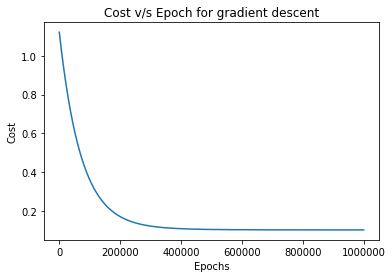

0.10227304034479473

In [0]:
weight_predicted = gradient_descent(X,Y_noise)
y_predicted = predict_output(X,weight_predicted)
mse = calculate_mse(y_predicted,Y_noise,N)
mse

In [0]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [0]:
def logistic_cost(y_actual,y_predicted):
  return np.sum(((-y_actual*np.log(y_predicted)) - ((1-y_actual)*np.log(1-y_predicted))))/y_predicted.shape[0]

In [0]:
def logistic_output(X,theta):
  t = sigmoid(np.dot(X,theta))
  for i in range(t.shape[0]):
    if(t[i]<0.5):
      t[i]=0
    else:
      t[i]=1
  return t

In [0]:
def logistic_gradient_descent(X,Y):
  epochs = 1000000
  alphas = [0.000001]
  for alpha in alphas:
    theta = np.ones((X.shape[1],1))
    h = sigmoid(np.dot(X,theta))
    cost = np.zeros((epochs,1))
    for i in range(epochs):
      theta[0] = theta[0] - alpha*np.sum(h-Y)/X.shape[0]
      for j in range(1,X.shape[1]):
        theta[j] = theta[j] - alpha/X.shape[0] * np.sum((h-Y)*X[:,j])
        h = sigmoid(np.dot(X,theta))
      cost[i] = logistic_cost(Y,h)
      if(i>0 and cost[i]>cost[i-1]):
        epochs = i
        break
      if(i%50000==0):
        print("Epoch : " , i , " Cost : " , cost[i])
    plt.plot(np.arange(epochs),cost)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost v/s Epoch for gradient descent')
    plt.show()
    if(alpha==0.000001):
      return theta

In [0]:
def prediction_table(y_actual,y_predicted):
  table = pd.DataFrame(columns=['Positive','Negative'])
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  for i in range(y_predicted.shape[0]):
    if(y_actual[i]==1):
      if(y_predicted[i]==1):
        tp+=1
      else:
        fn+=1
    elif(y_actual[i]==0):
      if(y_predicted[i]==1):
        fp+=1
      else:
        tn+=1
  table.loc['Positive'] = [tp,fp]
  table.loc['Negative'] = [fn,tn]
  return table

**Gradient Descent Solution for multi variable logistic regression**

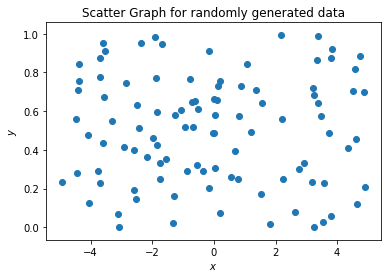

In [0]:
x = np.random.uniform(-5,5,(100,1))
y = np.random.uniform(0,1,(100,1))
plt.scatter(x,y)
plt.title('Scatter Graph for randomly generated data')
graph()

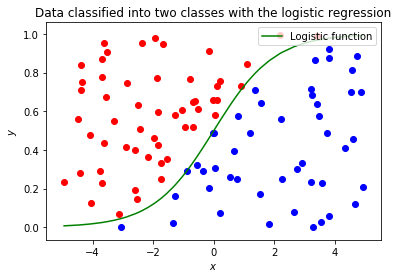

In [0]:
labels = np.zeros((x.shape[0],1))
vals = np.zeros((x.shape[0],1))
for i in range(x.shape[0]):
  if(y[i]<1/(1 + math.exp(-x[i]))):
    labels[i]=0
  else:
    labels[i]=1
for i in range(x.shape[0]):
  if(labels[i]==1):
    plt.scatter(x[i],y[i],color='red')
  else:
    plt.scatter(x[i],y[i],color='blue')
plt.plot(np.sort(x,axis=0),1/(1+np.exp(-np.sort(x,axis=0))),color='green',label='Logistic function')
plt.legend(loc="upper right")
plt.title('Data classified into two classes with the logistic regression')
graph()

In [0]:
X = np.zeros((x.shape[0],2))
X[:,1] = x[:,0]
X[:,0] = np.ones(x.shape[0])
Y = labels

In [0]:
def logistic_gradient_descent(X,Y):
  epochs = 1000000
  alphas = [0.00001]
  for alpha in alphas:
    theta = np.zeros((X.shape[1],1))
    h = sigmoid(np.dot(X,theta))
    cost = np.zeros((epochs,1))
    for i in range(epochs):
      theta[0] = theta[0] - alpha*np.sum(h-Y)/X.shape[0]
      for j in range(1,X.shape[1]):
        theta[j] = theta[j] - alpha/X.shape[0] * np.sum((h-Y)*X[:,j])
        h = sigmoid(np.dot(X,theta))
      cost[i] = logistic_cost(Y,h)
      if(i>0 and cost[i]>cost[i-1]):
        epochs = i
        break
      if(i%50000==0):
        print("Epoch : " , i , " Cost : " , cost[i])
    plt.plot(np.arange(epochs),cost[:epochs])
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost v/s Epoch for gradient descent')
    plt.show()
    if(alpha==0.00001):
      return theta

Epoch :  0  Cost :  [0.6931429]
Epoch :  50000  Cost :  [0.53650005]
Epoch :  100000  Cost :  [0.45490069]
Epoch :  150000  Cost :  [0.41058937]
Epoch :  200000  Cost :  [0.38520788]
Epoch :  250000  Cost :  [0.36996488]
Epoch :  300000  Cost :  [0.36046102]
Epoch :  350000  Cost :  [0.3543665]
Epoch :  400000  Cost :  [0.3503793]
Epoch :  450000  Cost :  [0.34773689]
Epoch :  500000  Cost :  [0.34597464]
Epoch :  550000  Cost :  [0.34479992]
Epoch :  600000  Cost :  [0.34402328]
Epoch :  650000  Cost :  [0.34351924]
Epoch :  700000  Cost :  [0.34320313]
Epoch :  750000  Cost :  [0.34301693]
Epoch :  800000  Cost :  [0.3429204]
Epoch :  850000  Cost :  [0.34288536]


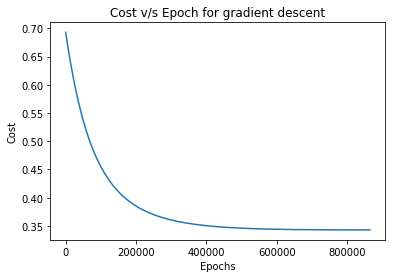

0.34288370087441594

In [0]:
weight_predicted = logistic_gradient_descent(X,Y)
y_hat = sigmoid(np.dot(X,weight_predicted))
cost = logistic_cost(Y,y_hat)
y_predicted = logistic_output(X,weight_predicted)
cost

In [0]:
df = prediction_table(Y,y_predicted)
df

,Positive,Negative
Positive,47,10
Negative,7,36


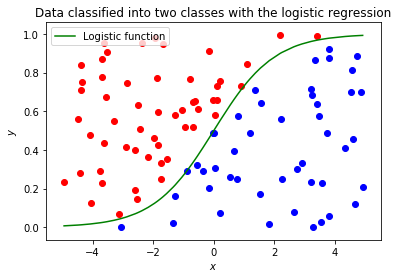

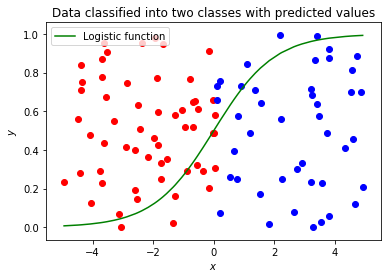

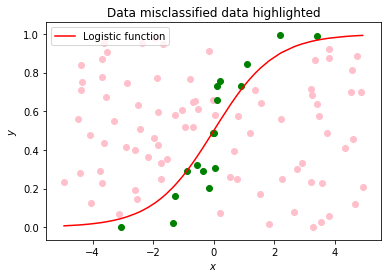

In [0]:
for i in range(x.shape[0]):
  if(labels[i]==1):
    plt.scatter(x[i],y[i],color='red')
  else:
    plt.scatter(x[i],y[i],color='blue')
plt.plot(np.sort(x,axis=0),1/(1+np.exp(-np.sort(x,axis=0))),color='green',label='Logistic function')
plt.legend(loc="upper left")
plt.title('Data classified into two classes with the logistic regression')
graph()
for i in range(x.shape[0]):
  if(y_predicted[i]==1):
    plt.scatter(x[i],y[i],color='red')
  else:
    plt.scatter(x[i],y[i],color='blue')
plt.plot(np.sort(x,axis=0),1/(1+np.exp(-np.sort(x,axis=0))),color='green',label='Logistic function')
plt.legend(loc="upper left")
plt.title('Data classified into two classes with predicted values')
graph()
for i in range(x.shape[0]):
  if(y_predicted[i]==labels[i]):
    plt.scatter(x[i],y[i],color='pink')
  else:
    plt.scatter(x[i],y[i],color='green')
plt.plot(np.sort(x,axis=0),1/(1+np.exp(-np.sort(x,axis=0))),color='red',label='Logistic function')
plt.legend(loc="upper left")
plt.title('Data misclassified data highlighted')
graph()

In [0]:
weight_predicted

array([[ 0.0937218 ],
       [-0.96575395]])